In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pierwszym krokiem będzie wczytanie danych i wykonanie podstawowej analizy statystycznej. Sprawdzimy typy danych, brakujące wartości i uzyskamy ogólne statystyki opisowe. Następnie przejdziemy do bardziej szczegółowej analizy, w tym analizy zależności pomiędzy cechami telefonów a ich przedziałem cenowym.

In [6]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('mobile-price-classification_train.csv')

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Przejdźmy teraz do analizy statystycznej, aby lepiej zrozumieć dane. Sprawdzę, czy istnieją jakieś brakujące wartości, oraz przeprowadzę analizę statystyk opisowych dla każdej z kolumn

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

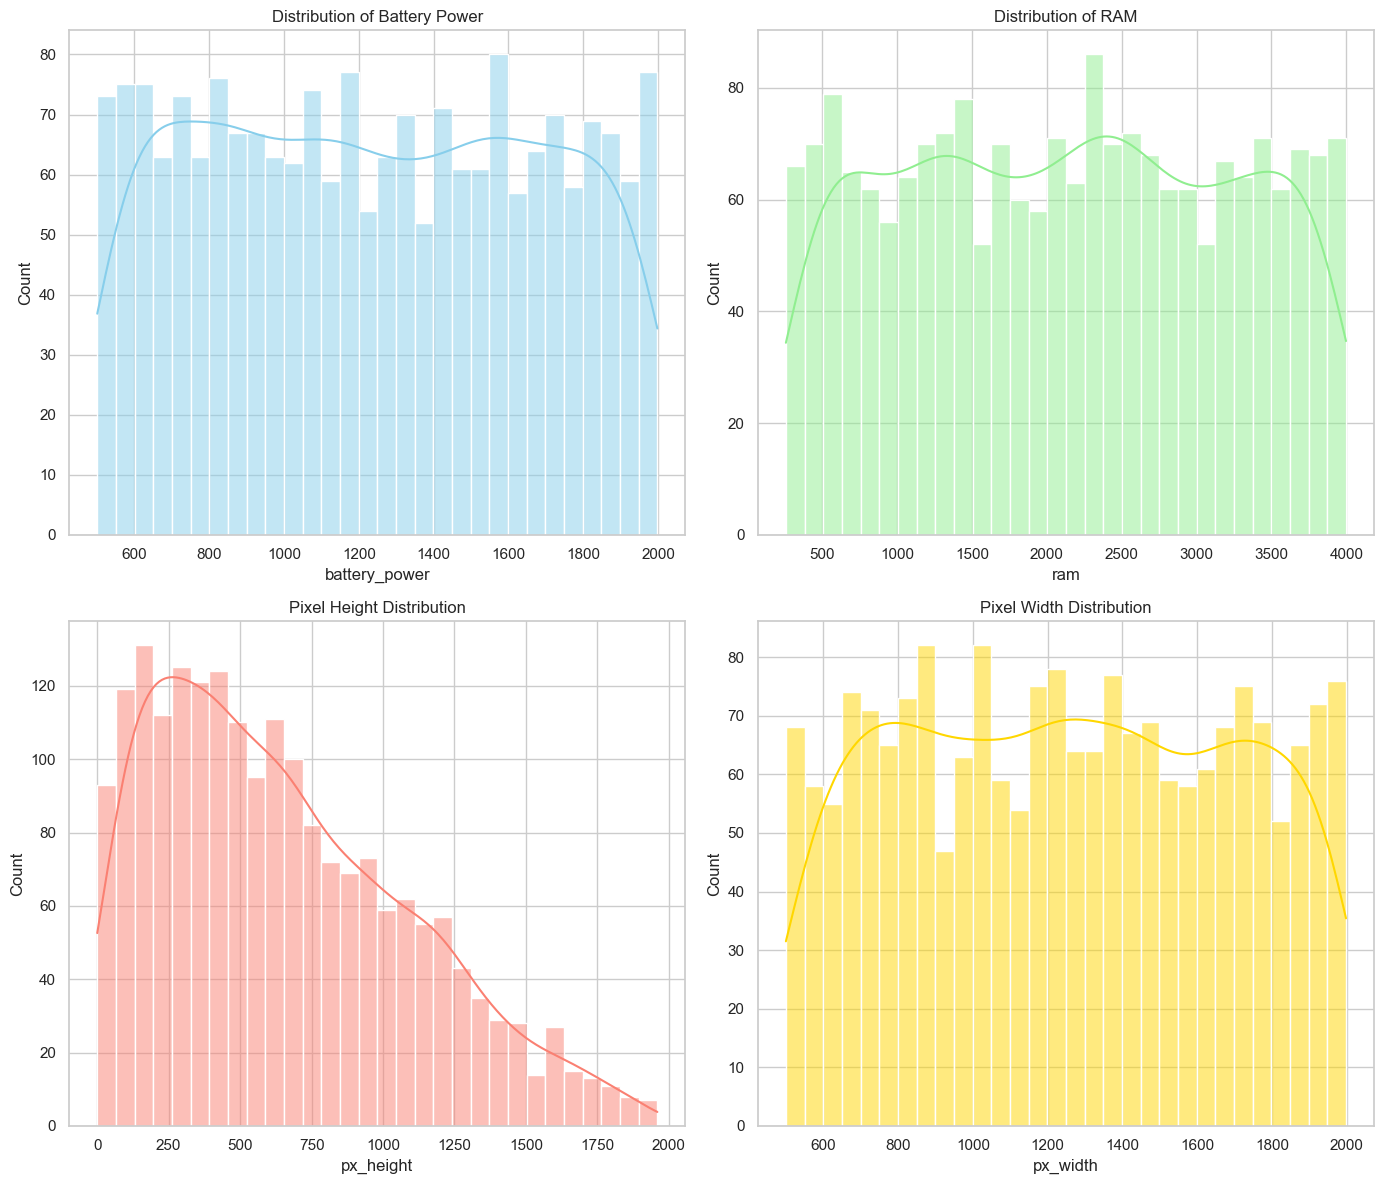

In [12]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.histplot(df['battery_power'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Battery Power')

sns.histplot(df['ram'], bins=30, kde=True, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of RAM')

sns.histplot(df['px_height'], bins=30, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Pixel Height Distribution')

sns.histplot(df['px_width'], bins=30, kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Pixel Width Distribution')

plt.tight_layout()
plt.show()

Analiza wstępna danych wykazała, że:

     

1.   Zestaw danych zawiera różnorodne cechy, takie jak **moc baterii**, **obecność Bluetooth**, **szybkość zegara procesora**, **obsługa Dual SIM**, **rozdzielczość kamery**, **wsparcie dla 4G**, **pamięć wewnętrzna**, **waga telefonu**, **liczba rdzeni procesora**, a także dane dotyczące **wyświetlacza** i **baterii**.
3.   Brak brakujących wartości w danych.
4.   Średnie wartości, odchylenia standardowe, wartości minimalne i maksymalne pomagają zrozumieć zakres i rozkład danych. Na przykład, **battery_power** waha się od `501` do `1998`, z średnią wartością `1238.5`.
5.   **ram** wykazuje duże odchylenie standardowe (`1084.73`), co sugeruje dużą różnorodność w tej zmiennej.
6.   Zmienna **price_range**, którą chcemy przewidywać, wydaje się być równomiernie rozłożona (średnia około `1.5`, max to `3`), co sugeruje, że mamy do czynienia z czterema przedziałami cenowymi (`0`, `1`, `2`, `3`).  

Następnie zbadam zależności między zmiennymi, szczególnie w kontekście zależności od **price_range**, który jest naszą zmienną objaśnianą. Wykonam to poprzez obliczenie korelacji oraz stworzenie tabel przestawnych i wizualizacji. Zacznijmy od korelacji

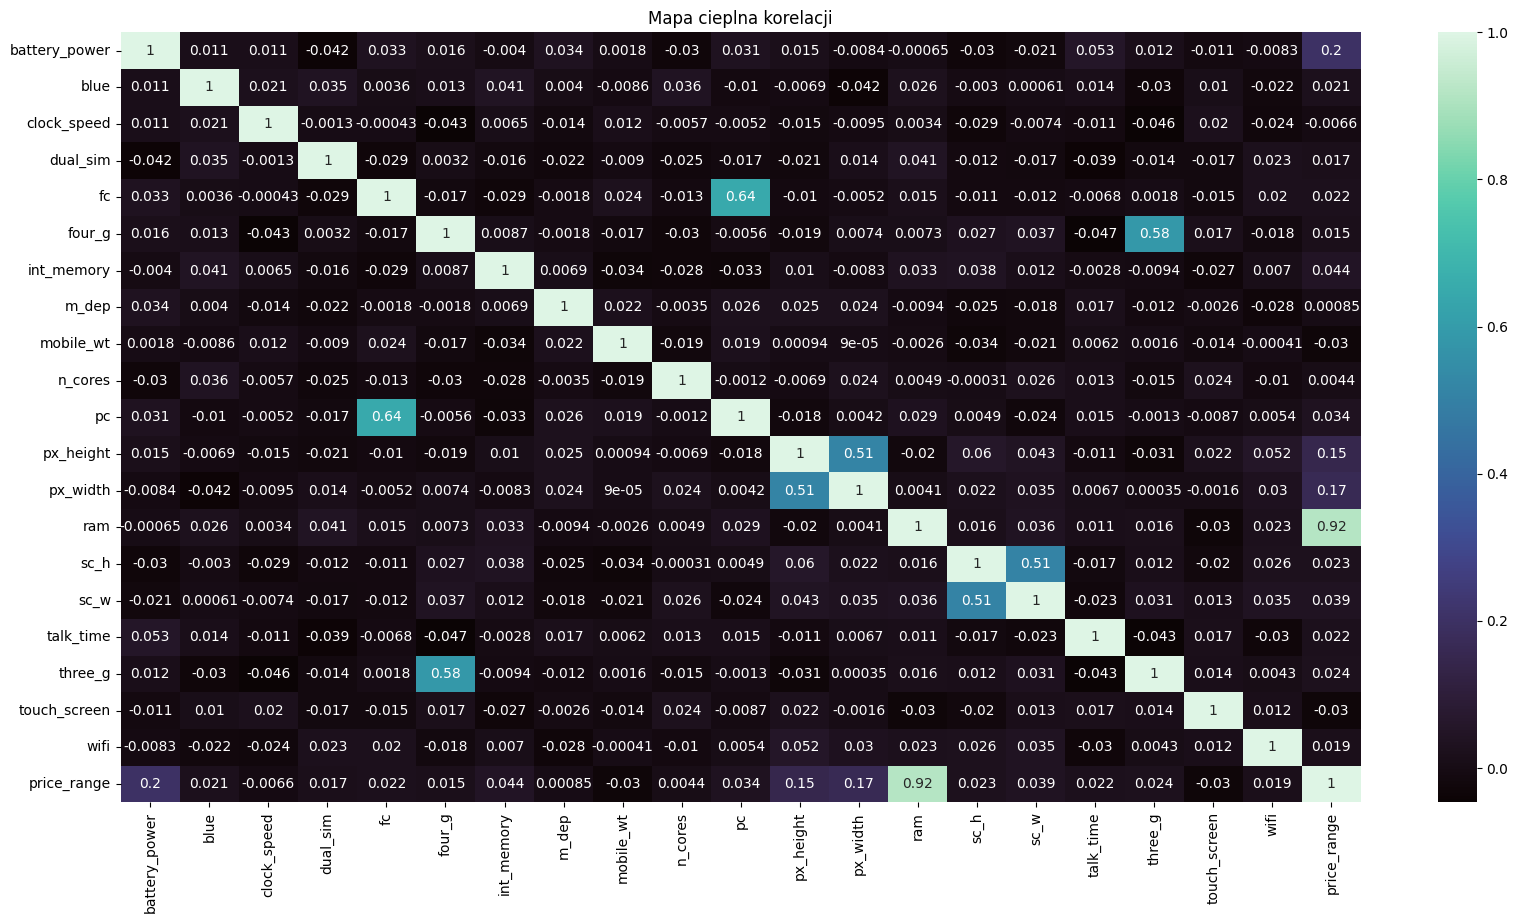

In [10]:
# Obliczenie korelacji
correlation_matrix = df.corr()

# Wyświetlenie mapy cieplnej korelacji
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='mako')
plt.title("Mapa cieplna korelacji")
plt.show()

**ram** wykazuje silną dodatnią korelację z **price_range**, co sugeruje, że większa pamięć RAM jest znacząco powiązana z wyższym przedziałem cenowym.

Inne zmienne takie jak **battery_power**, **int_memory**, **px_height**, **px_width** również wykazują pozytywną korelację, choć mniej wyraźną.

Cechy takie jak **blue**, **dual_sim**, **four_g**, **three_g**, **touch_screen**, **wifi** mają bardzo niską korelację z ceną, co wskazuje, że nie są one znaczącymi czynnikami decydującymi o przedziale cenowym.

Następnym krokiem będzie przeprowadzenie bardziej szczegółowej analizy, aby zrozumieć, jak poszczególne cechy telefonu wpływają na jego przedział cenowy. Rozpoczniemy od analizy zależności między zmienną objaśnianą a objaśniającymi, w tym od statystyk w podgrupach i tabel przestawnych, a także od wizualizacji danych. ​

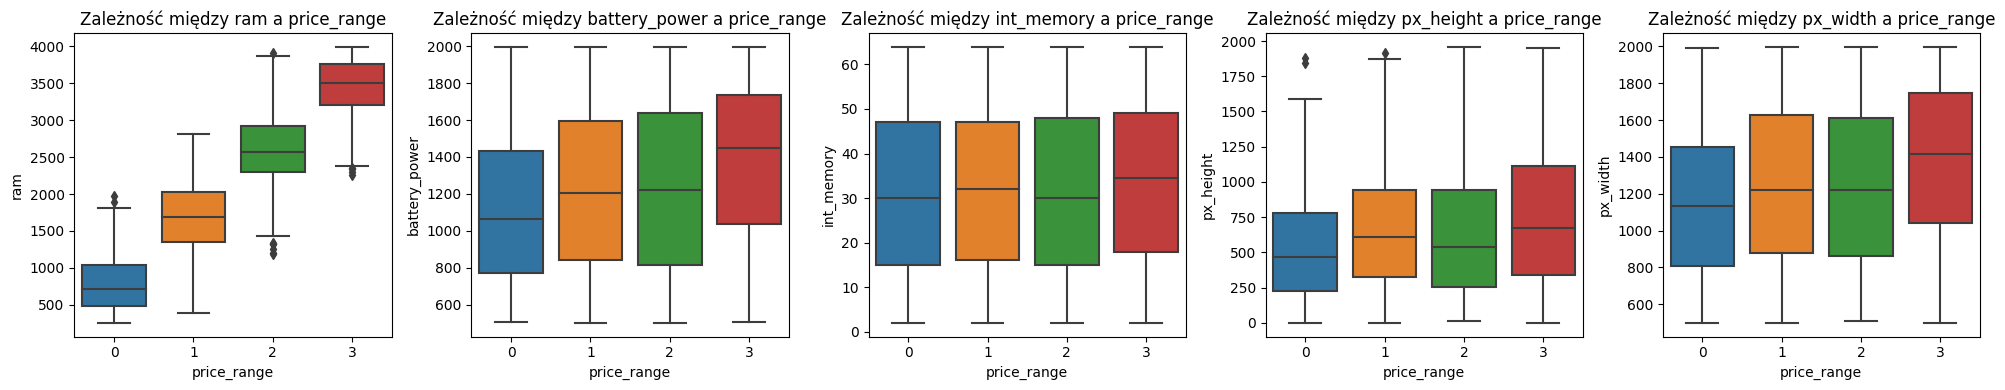

In [11]:
# Wybrane cechy do wyświetlenia
selected_features = ['ram', 'battery_power', 'int_memory', 'px_height', 'px_width']

# Ustawienie układu siatki wykresów
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Tworzenie wykresów dla wybranych cech
for i, feature in enumerate(selected_features):
    ax = axes[i]
    sns.boxplot(x='price_range', y=feature, data=df, ax=ax)
    ax.set_title(f'Zależność między {feature} a price_range')

# Dopasowanie układu
plt.tight_layout()
plt.show()

Wizualizacje rozkładów empirycznych dla wybranych cech przedstawiają interesujące wnioski:

Rozkład zmiennej **price_range**: Widać, że dane są równomiernie rozłożone między różnymi przedziałami cenowymi. Oznacza to, że mamy zbalansowany zestaw danych pod względem ceny.

Pamięć RAM (**ram**): Rozkład pamięci RAM wyraźnie pokazuje, że jest to zmienna, która może różnicować telefony w różnych przedziałach cenowych. Wyższa pamięć RAM często wiąże się z wyższym przedziałem cenowym.

Pojemność baterii (**battery_power**): Rozkład pojemności baterii jest stosunkowo równomierny, ale można zauważyć pewną tendencję do wyższych poziomów pojemności w wyższych przedziałach cenowych.

Wysokość i szerokość pikseli (**px_height** i **px_width**): Te cechy wykazują dość równomierne rozkłady, co może wskazywać na ich mniejsze znaczenie w różnicowaniu cen.

# Podsumowanie

Pamięć RAM (**ram**):
    Jest to najbardziej znacząca cecha wpływająca na przedział cenowy telefonów.
    Telefony z wyższą pamięcią RAM są konsekwentnie umieszczane w wyższych przedziałach cenowych.
    Dla firm produkujących telefony, inwestycja w lepszą pamięć RAM może być kluczowa dla osiągnięcia wyższych cen.

Moc Baterii (**battery_power**):
    Moc baterii ma wyraźny wpływ na przedział cenowy, z mocniejszymi bateriami często pojawiającymi się w droższych telefonach.
    Dla konsumentów dłuższy czas pracy na baterii może być ważnym czynnikiem przy wyborze telefonu, co może usprawiedliwiać wyższą cenę.

Pamięć Wewnętrzna (**int_memory**):
    Większa pamięć wewnętrzna może być atrakcyjna dla konsumentów, którzy potrzebują więcej miejsca na przechowywanie danych, co może pozytywnie wpływać na postrzeganie wartości telefonu.

Rozdzielczość Ekranu (**px_height** i **px_width**):
    Wyższa rozdzielczość ekranu często wiąże się z wyższym przedziałem cenowym, co może być ważne dla konsumentów ceniących jakość obrazu i doświadczenie wizualne.
    Zwiększenie rozdzielczości ekranu może być atrakcyjnym elementem dla segmentu premium.

# Strategia Cenowa dla Firmy Jana Nowaka

Skupienie na Pamięci RAM i Mocy Baterii: Te dwie cechy są kluczowe dla uzyskania wyższych cen. Wysoka pamięć RAM w połączeniu z mocną baterią może pozwolić na umieszczenie produktu w wyższym przedziale cenowym.

Rozważenie Jakości Ekranu: Chociaż ta cecha jest ważna, to nie ma tak dużego wpływu na cenę jak pamięć RAM i moc baterii. Należy zrównoważyć koszty z potencjalnymi korzyściami.

Różnicowanie Produktów: Możliwość oferowania różnych wersji telefonów z różnymi poziomami pamięci RAM, mocy baterii i pamięć wewnętrzna może pozwolić na dotarcie do szerszego spektrum konsumentów z różnymi budżetami.